In [38]:
import os
import sys

import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

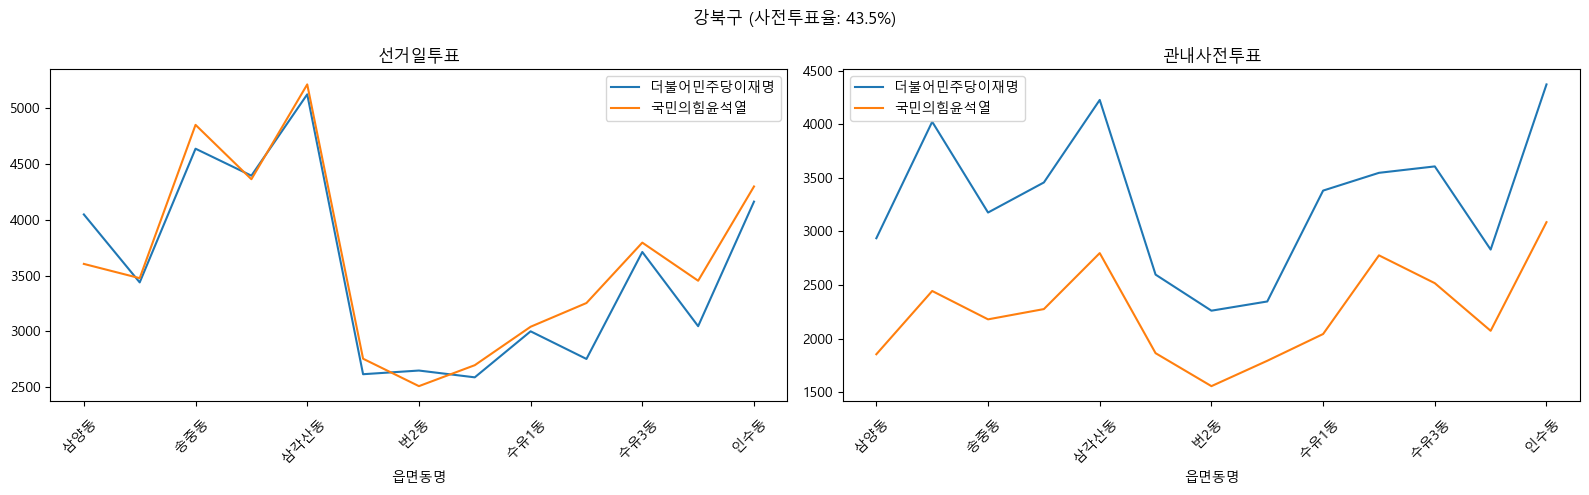

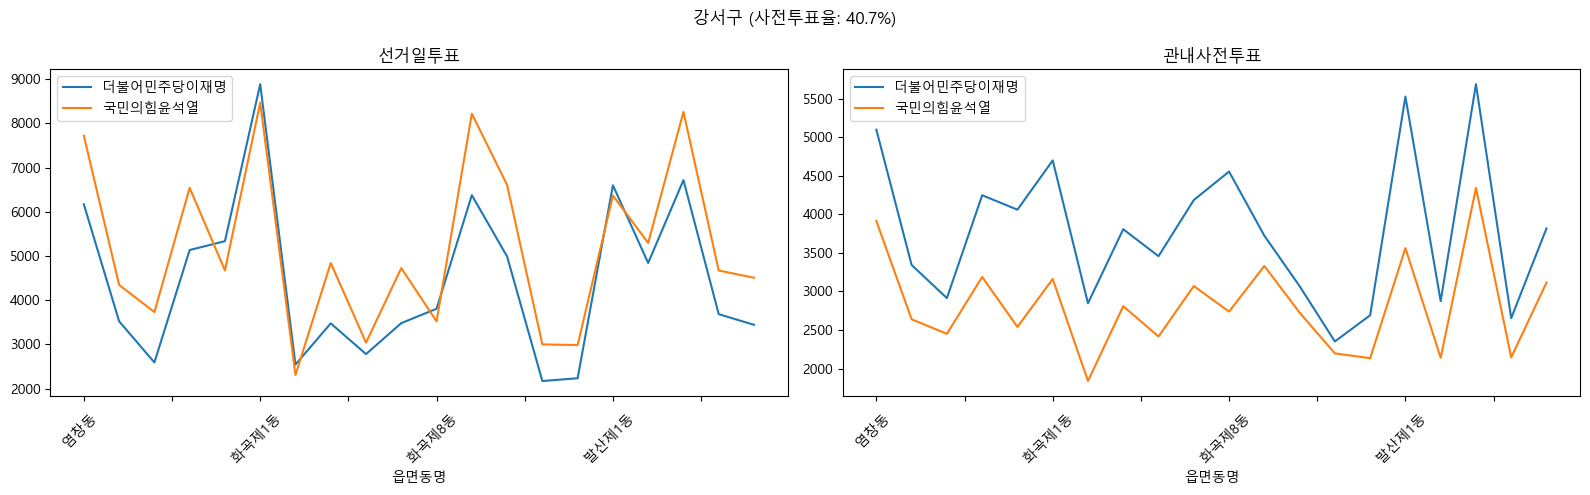

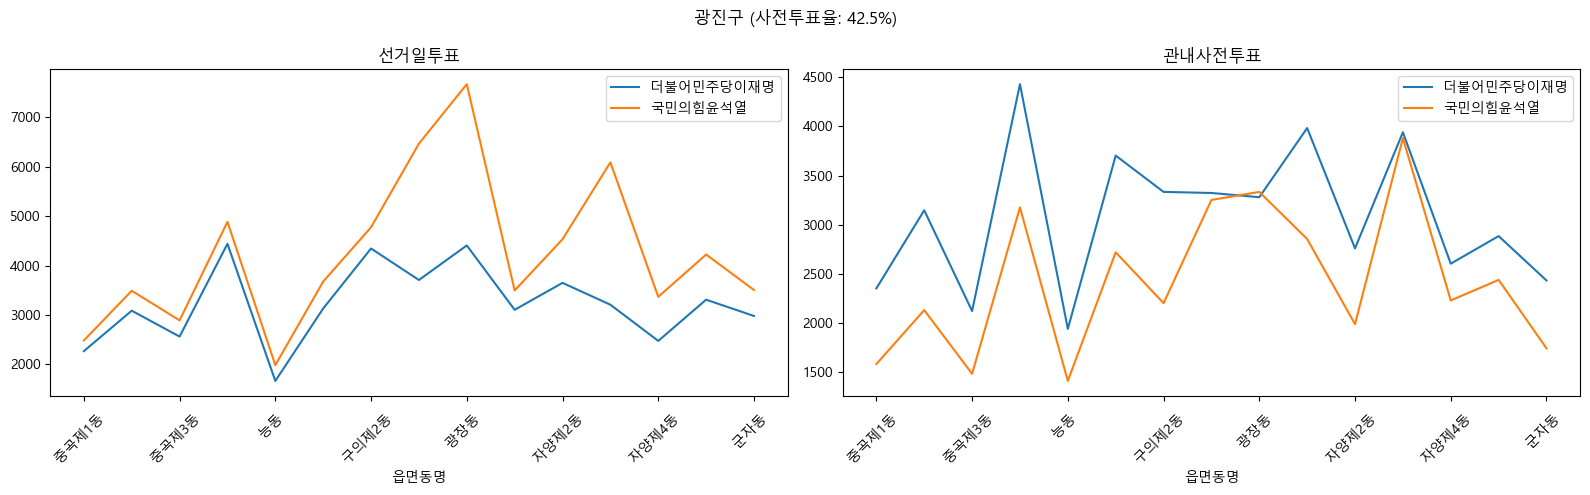

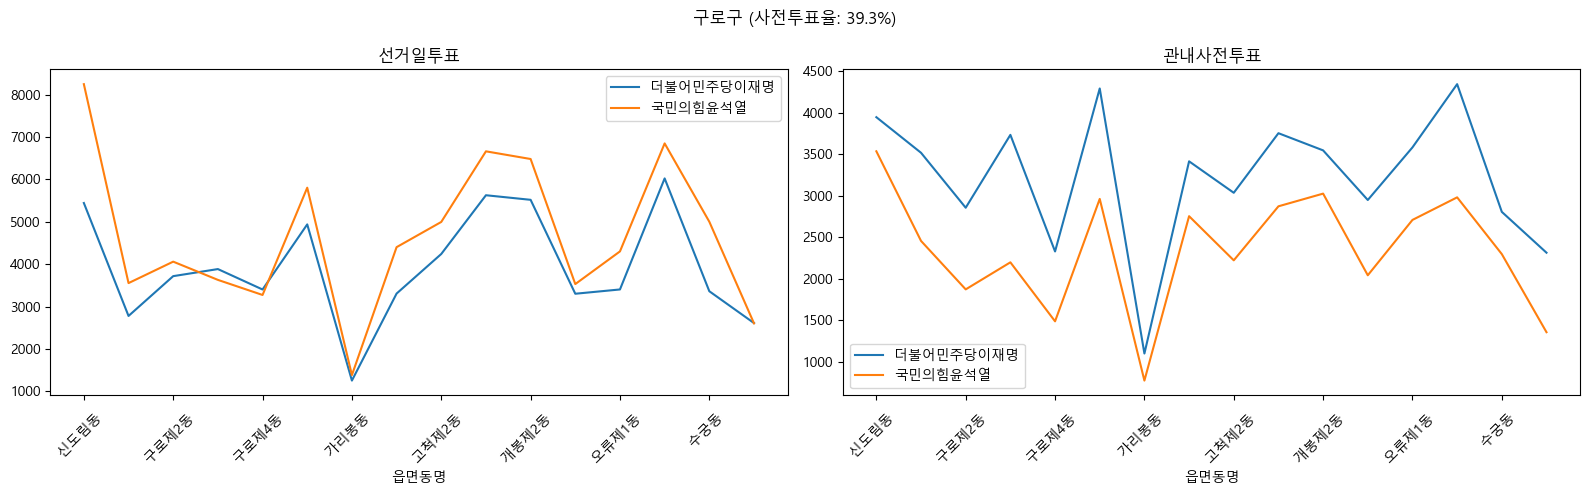

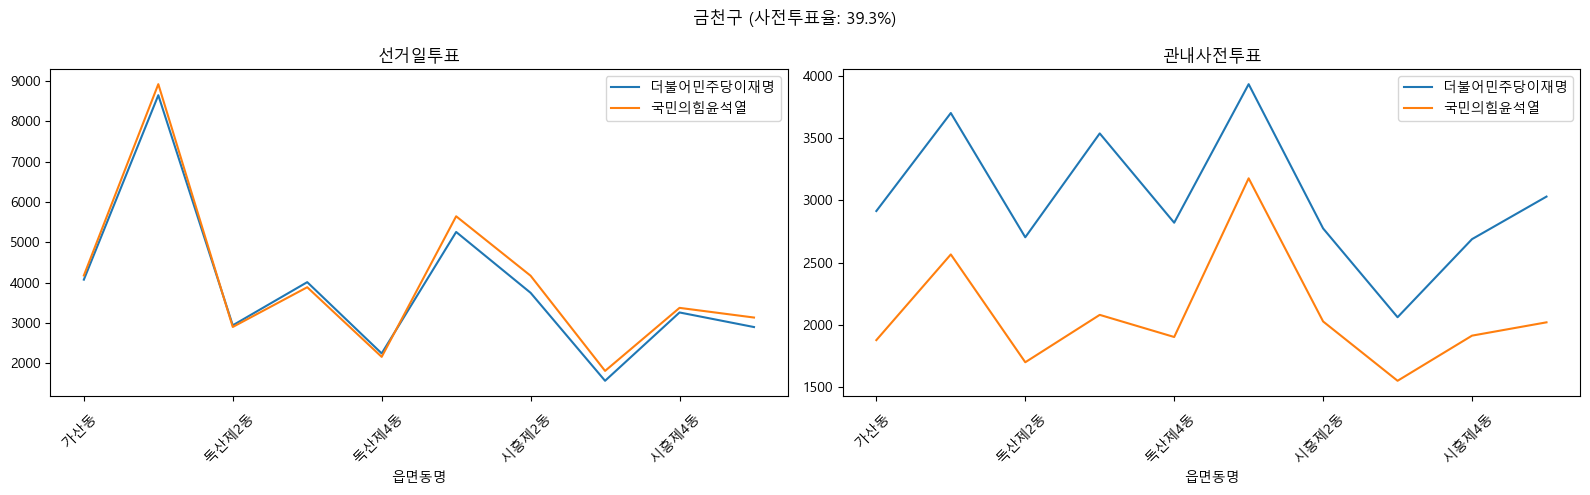

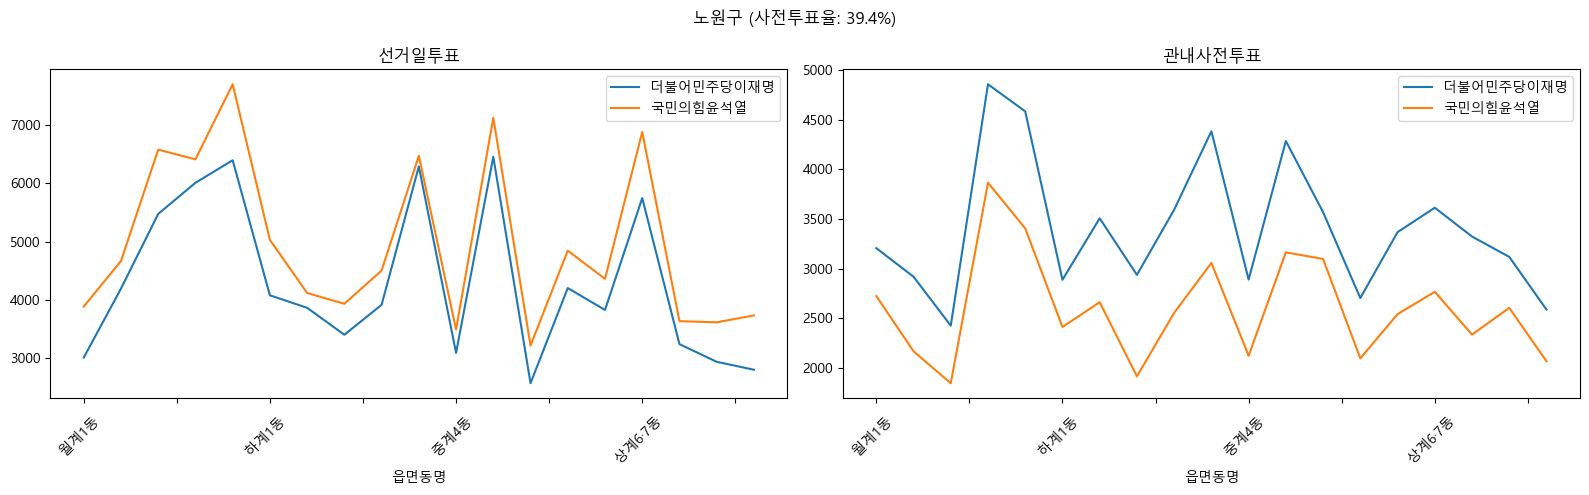

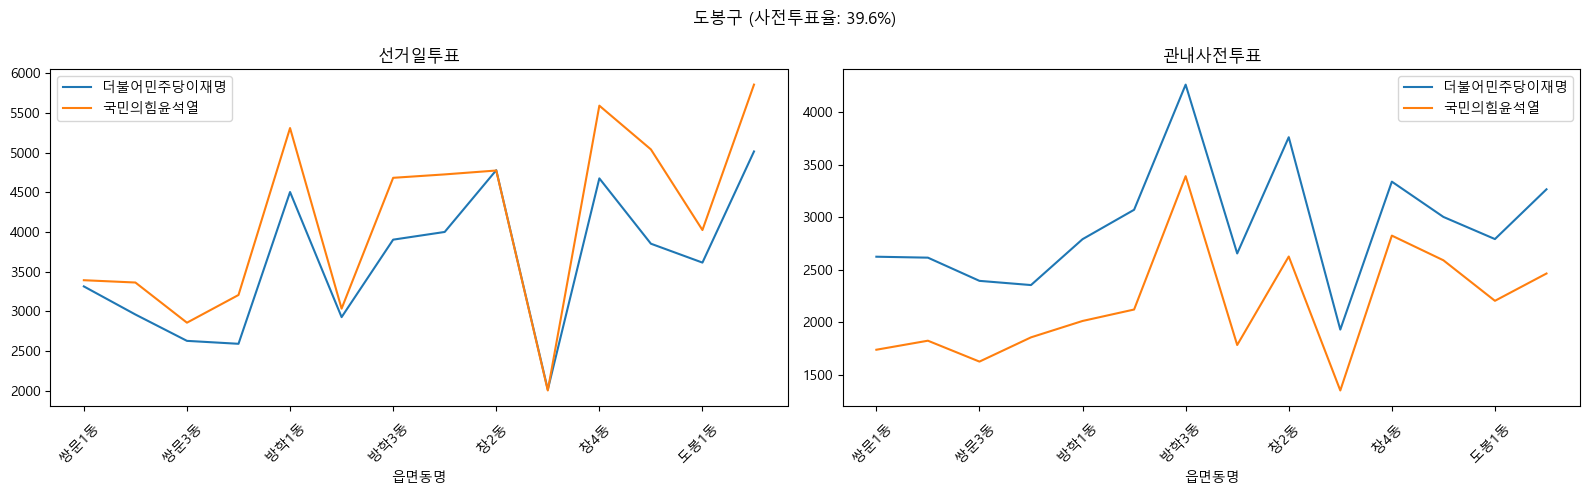

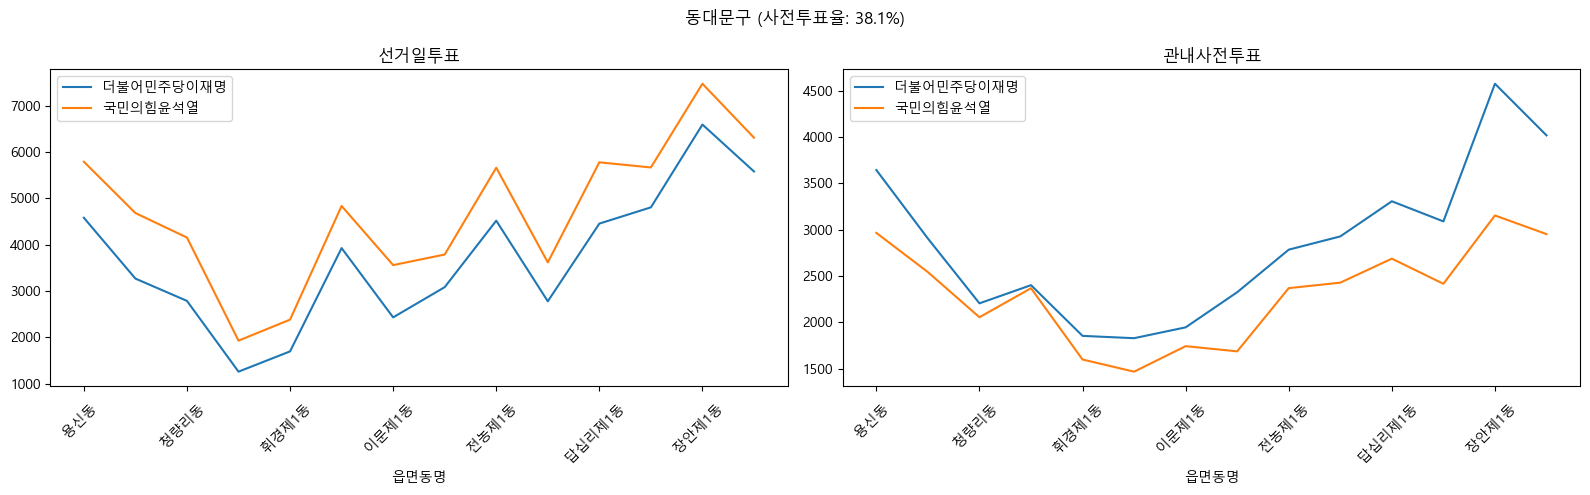

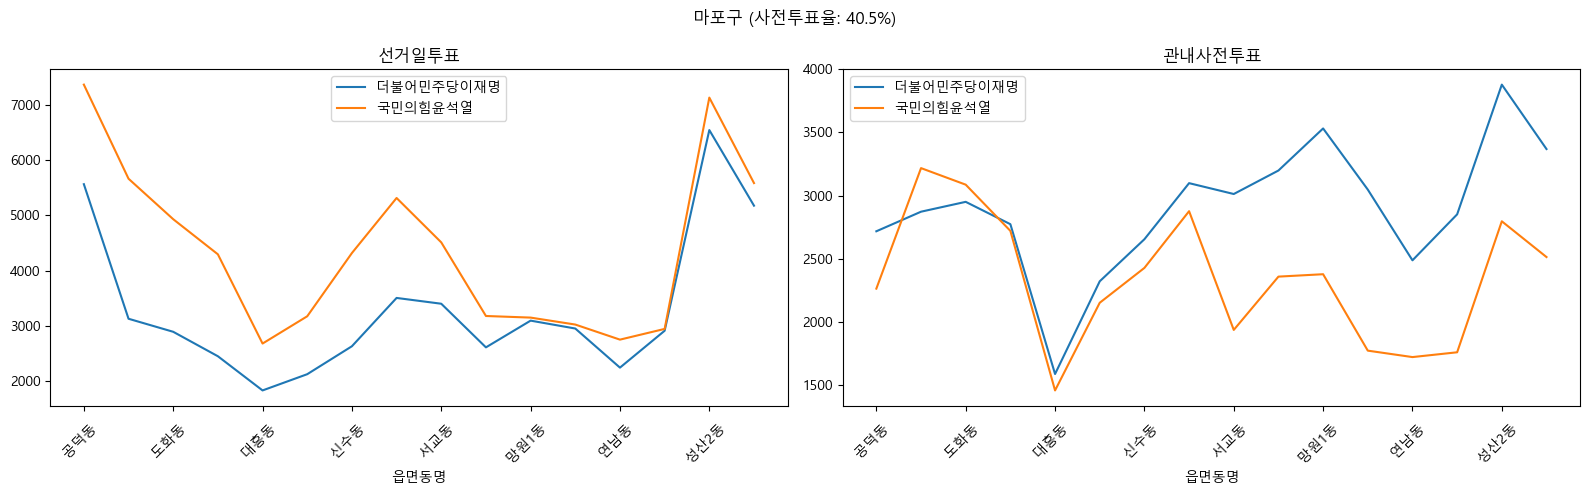

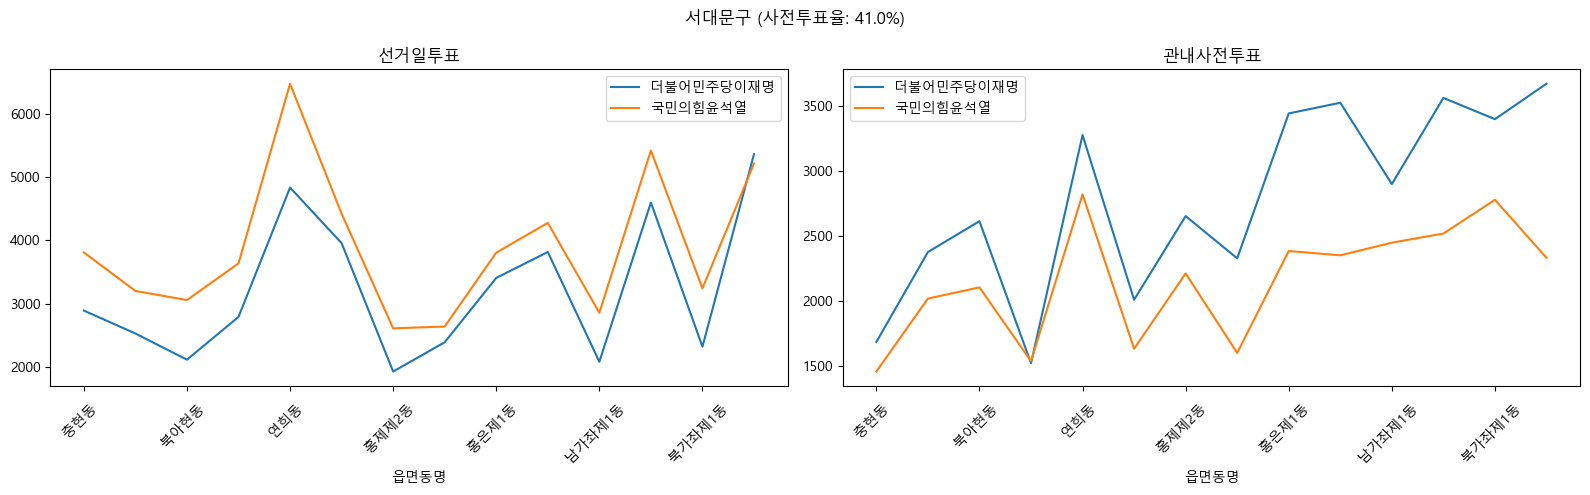

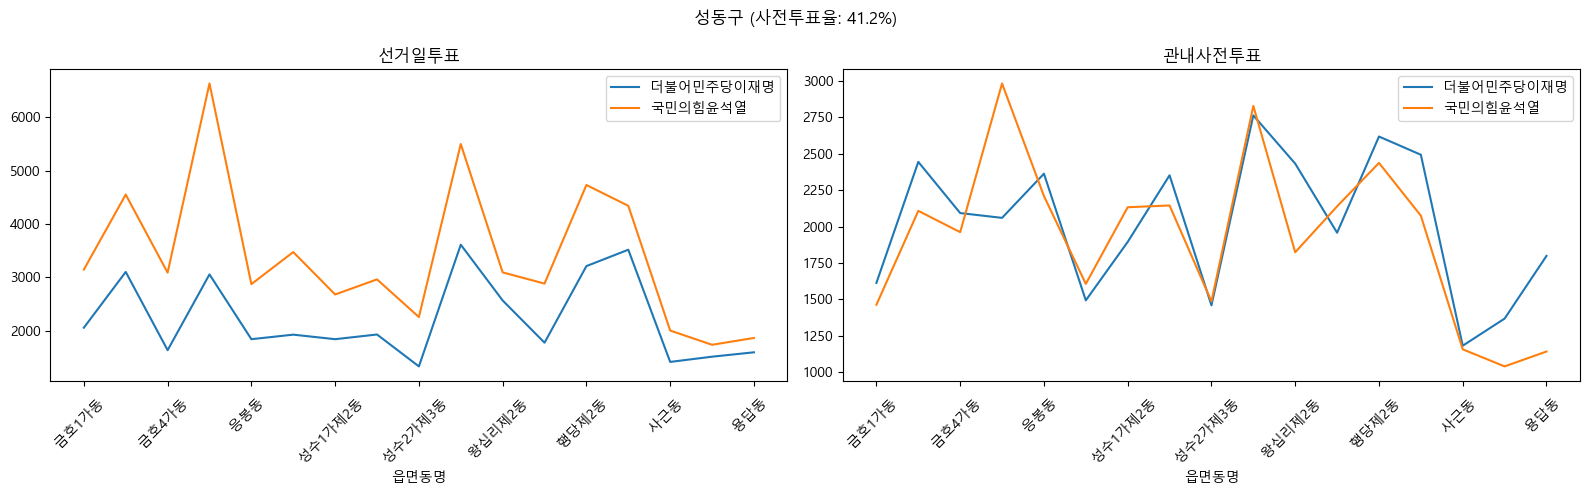

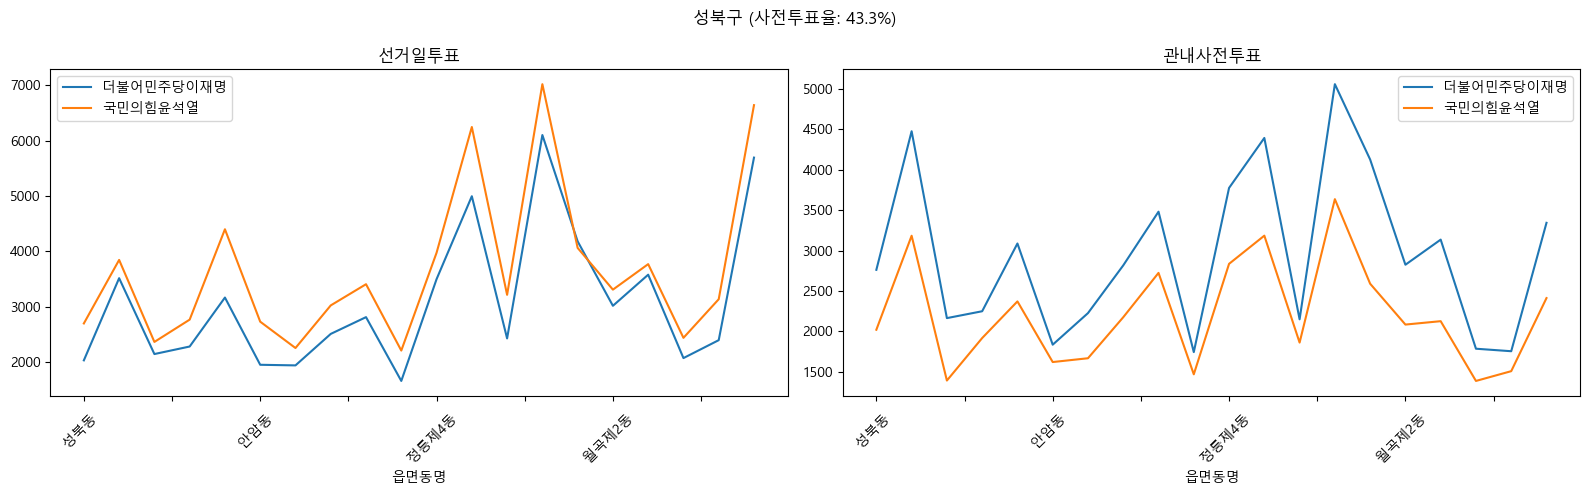

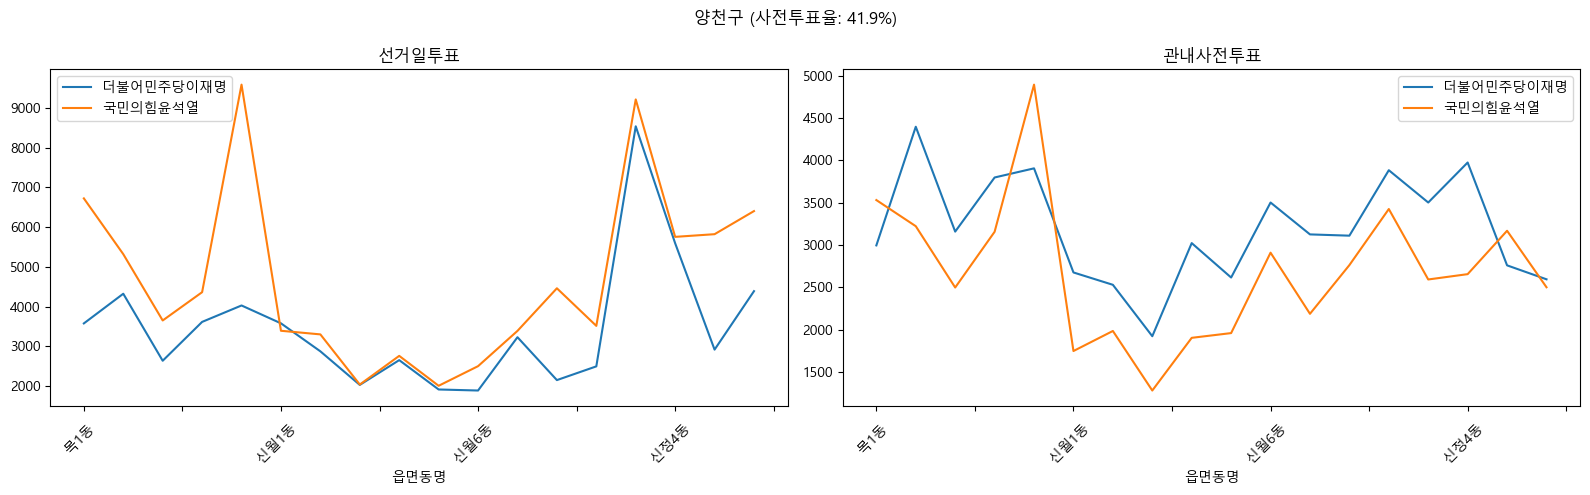

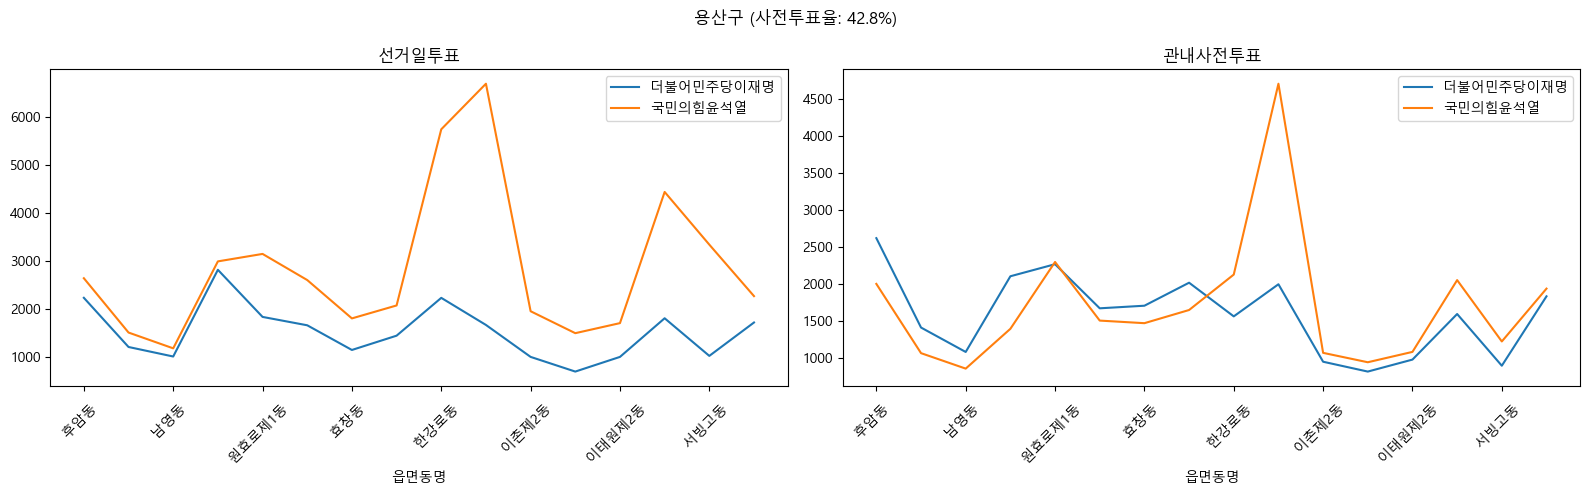

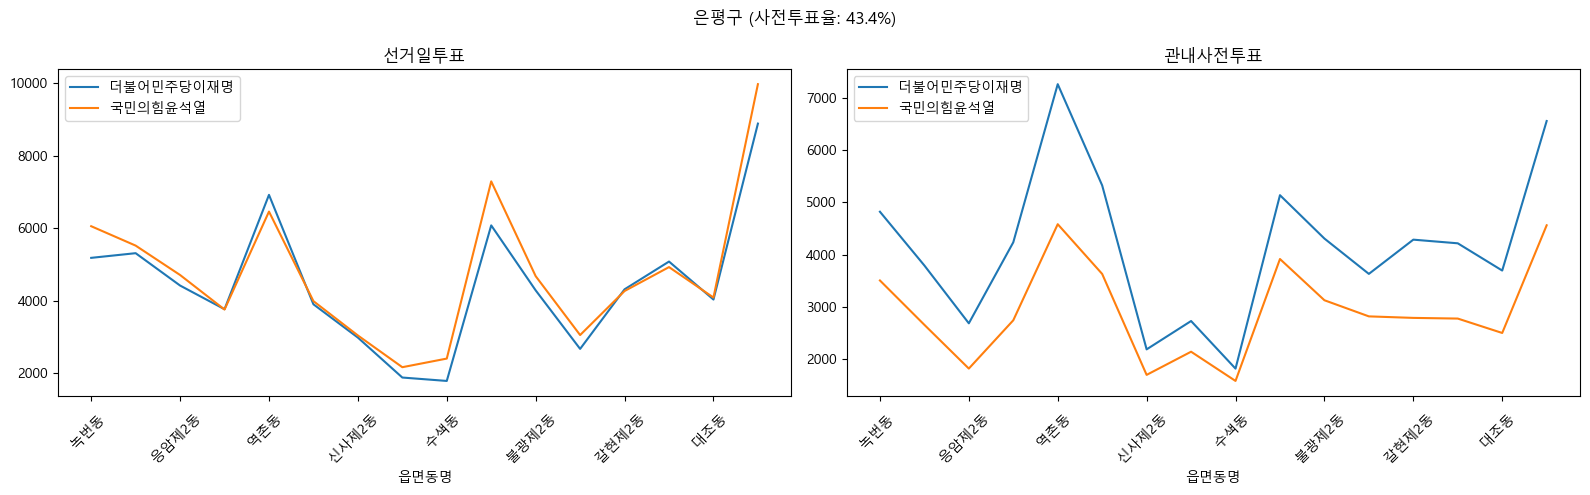

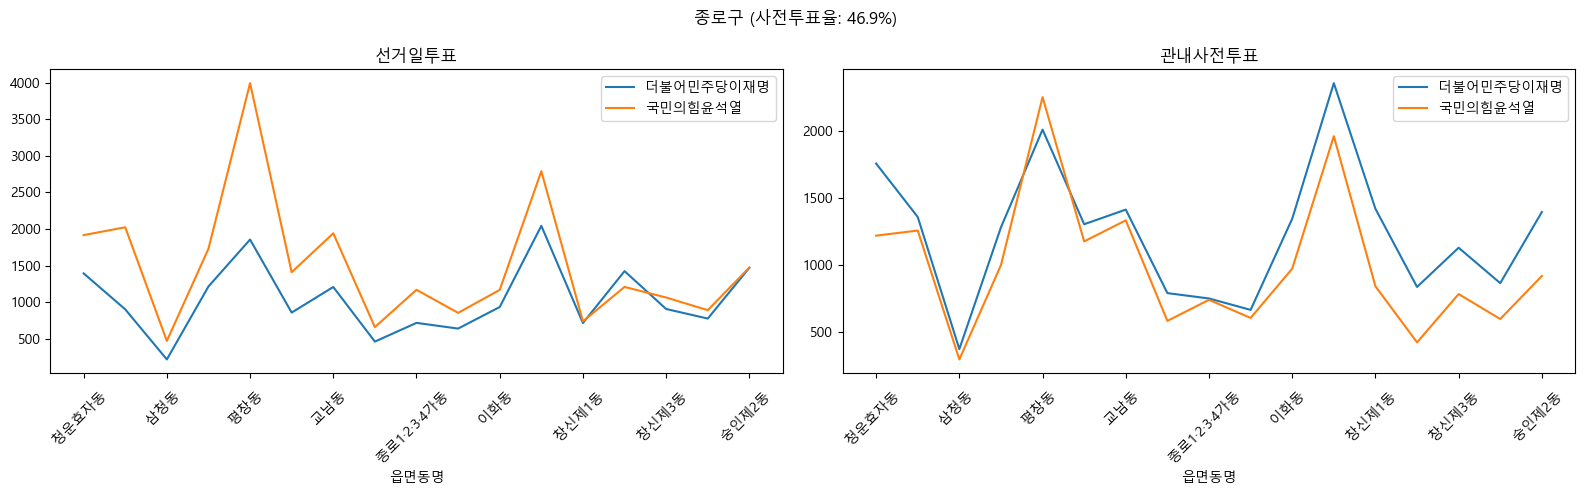

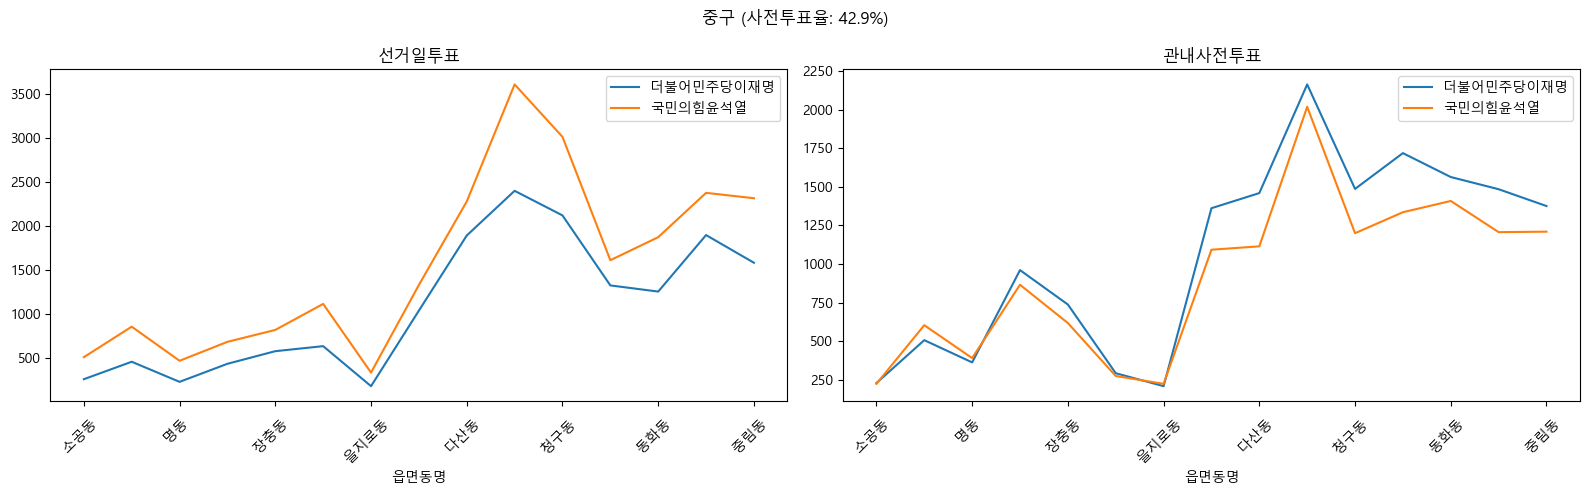

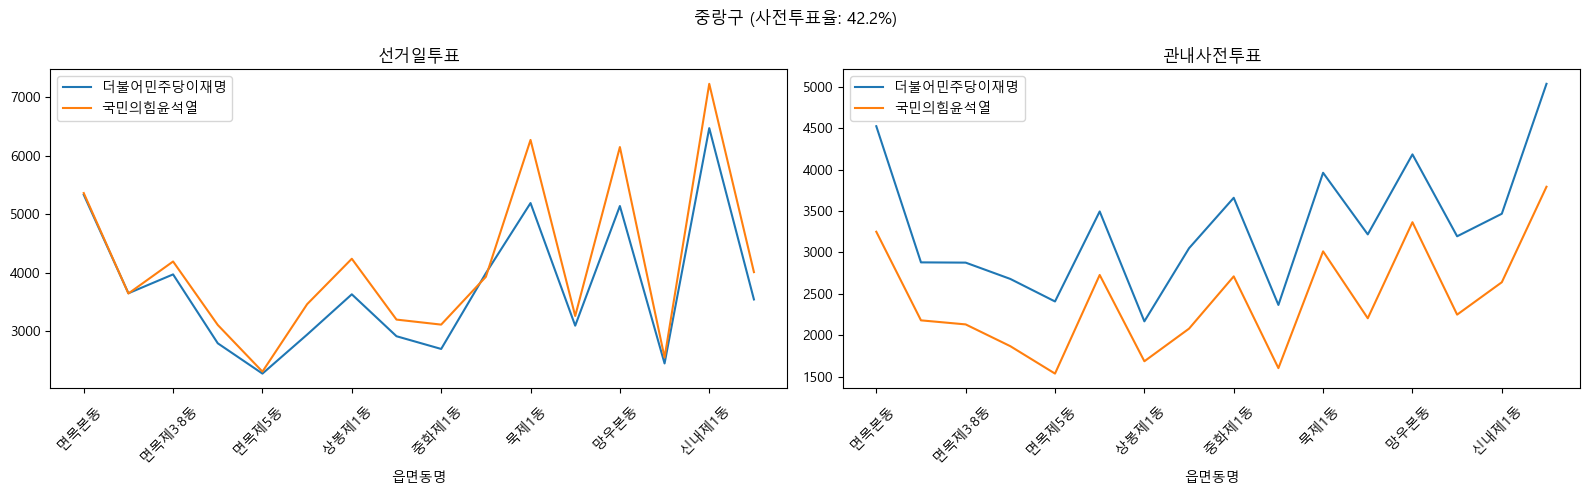

In [96]:
for data_path in glob('data/*'):
    지역구명 = os.path.split(data_path)[-1].split('.')[0].split('[')[-1].strip(']')
    df = pd.read_excel(f'{data_path}', header=5).rename(columns={
        "Unnamed: 0":"읍면동명",
        "Unnamed: 1":"구분",
        "Unnamed: 2":"선거인수",
        "Unnamed: 3":"투표수",
        "Unnamed: 17":"무효투표수",
        "Unnamed: 18":"기권자수",
        })
    df['index'] = df['읍면동명'] + df['구분']
    cols = ['index'] + [col for col in df.columns if col != 'index']
    df = df[cols]
    df['구분'] = df['구분'].str.replace(' ','')
    df.columns = df.columns.str.replace('\n', '', regex=False)
    df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else int(x))

    early_voting = df[df['구분'] == '관내사전투표']
    onday_voting = df[df['구분'] == '선거일투표']

    # 사전투표율 계산
    early_total = early_voting[['더불어민주당이재명', '국민의힘윤석열']].astype(int).sum().sum()
    onday_total = onday_voting[['더불어민주당이재명', '국민의힘윤석열']].astype(int).sum().sum()
    total_votes = early_total + onday_total

    early_rate = early_total / total_votes * 100

    # 1행 2열 플롯 생성
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # 전체 제목 (지역구명 + 사전투표율)
    fig.suptitle(f'{지역구명} (사전투표율: {early_rate:.1f}%)', fontsize=12)

    # 선거일 투표
    onday_voting.set_index('읍면동명')[['더불어민주당이재명','국민의힘윤석열']] \
        .astype(int).plot(ax=axes[0], title='선거일투표', rot=45)

    # 관내 사전투표
    early_voting.set_index('읍면동명')[['더불어민주당이재명','국민의힘윤석열']] \
        .astype(int).plot(ax=axes[1], title='관내사전투표', rot=45)

    plt.tight_layout()  # 타이틀 공간 확보
    plt.show()



In [102]:
# 동네 기준 사전투표 승률
for data_path in glob('data/*'):
    지역구명 = os.path.split(data_path)[-1].split('.')[0].split('[')[-1].strip(']')
    df = pd.read_excel(f'{data_path}', header=5).rename(columns={
        "Unnamed: 0":"읍면동명",
        "Unnamed: 1":"구분",
        "Unnamed: 2":"선거인수",
        "Unnamed: 3":"투표수",
        "Unnamed: 17":"무효투표수",
        "Unnamed: 18":"기권자수",
        })
    df['index'] = df['읍면동명'] + df['구분']
    cols = ['index'] + [col for col in df.columns if col != 'index']
    df = df[cols]
    df['구분'] = df['구분'].str.replace(' ','')
    df.columns = df.columns.str.replace('\n', '', regex=False)
    df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else int(x))

    early_voting = df[df['구분'] == '관내사전투표']
    onday_voting = df[df['구분'] == '선거일투표']

    # 후보별 이긴 읍면동 저장 리스트
    lee_wins = []
    yoon_wins = []

    # 읍면동별로 반복
    for _, row in early_voting.iterrows():
        dong = row['읍면동명']
        lee = int(row['더불어민주당이재명'])
        yoon = int(row['국민의힘윤석열'])

        if lee > yoon:
            lee_wins.append(dong)
        elif yoon > lee:
            yoon_wins.append(dong)
        # 동률이면 무시

    # 전체 비교 대상 수
    total_compared = len(lee_wins) + len(yoon_wins)

    # 승률 계산
    lee_rate = len(lee_wins) / total_compared * 100
    yoon_rate = len(yoon_wins) / total_compared * 100

    # 결과 출력
    print(f'✅ 이재명이 이긴 읍면동 수: {len(lee_wins)}')
    print(f'✅ 윤석열이 이긴 읍면동 수: {len(yoon_wins)}')
    print(f'📊 이재명 사전투표 승률: {lee_rate:.1f}%')
    print(f'📊 윤석열 사전투표 승률: {yoon_rate:.1f}%')

    print('\n🟦 이재명이 이긴 동네:')
    print(', '.join(lee_wins))

    print('\n🟥 윤석열이 이긴 동네:')
    print(', '.join(yoon_wins))



✅ 이재명이 이긴 읍면동 수: 13
✅ 윤석열이 이긴 읍면동 수: 0
📊 이재명 사전투표 승률: 100.0%
📊 윤석열 사전투표 승률: 0.0%

🟦 이재명이 이긴 동네:
삼양동  , 미아동  , 송중동  , 송천동  , 삼각산동  , 번1동  , 번2동  , 번3동  , 수유1동  , 수유2동  , 수유3동  , 우이동  , 인수동  

🟥 윤석열이 이긴 동네:

✅ 이재명이 이긴 읍면동 수: 20
✅ 윤석열이 이긴 읍면동 수: 0
📊 이재명 사전투표 승률: 100.0%
📊 윤석열 사전투표 승률: 0.0%

🟦 이재명이 이긴 동네:
염창동  , 등촌제1동  , 등촌제2동  , 등촌제3동  , 화곡본동  , 화곡제1동  , 화곡제2동  , 화곡제3동  , 화곡제4동  , 화곡제6동  , 화곡제8동  , 우장산동  , 가양제1동  , 가양제2동  , 가양제3동  , 발산제1동  , 공항동  , 방화제1동  , 방화제2동  , 방화제3동  

🟥 윤석열이 이긴 동네:

✅ 이재명이 이긴 읍면동 수: 14
✅ 윤석열이 이긴 읍면동 수: 1
📊 이재명 사전투표 승률: 93.3%
📊 윤석열 사전투표 승률: 6.7%

🟦 이재명이 이긴 동네:
중곡제1동  , 중곡제2동  , 중곡제3동  , 중곡제4동  , 능동  , 구의제1동  , 구의제2동  , 구의제3동  , 자양제1동  , 자양제2동  , 자양제3동  , 자양제4동  , 화양동  , 군자동  

🟥 윤석열이 이긴 동네:
광장동  
✅ 이재명이 이긴 읍면동 수: 16
✅ 윤석열이 이긴 읍면동 수: 0
📊 이재명 사전투표 승률: 100.0%
📊 윤석열 사전투표 승률: 0.0%

🟦 이재명이 이긴 동네:
신도림동  , 구로제1동  , 구로제2동  , 구로제3동  , 구로제4동  , 구로제5동  , 가리봉동  , 고척제1동  , 고척제2동  , 개봉제1동  , 개봉제2동  , 개봉제3동  , 오류제1동  , 오류제2동  , 수궁동  , 항동  

🟥 윤석열이 이긴 동네:

✅ 이재명이 이긴 읍면동 수: 10
✅ 윤석열이 

In [101]:
print('사전투표')
print( early_voting[['더불어민주당이재명', '국민의힘윤석열']].astype(int).sum())
print()
print('선거일투표')
print( onday_voting[['더불어민주당이재명', '국민의힘윤석열']].astype(int).sum())

# 이재명을 찍는 사람들이 더 사전투표를 많이한다?

사전투표
더불어민주당이재명    53155
국민의힘윤석열      39023
dtype: int64

선거일투표
더불어민주당이재명    60060
국민의힘윤석열      66009
dtype: int64


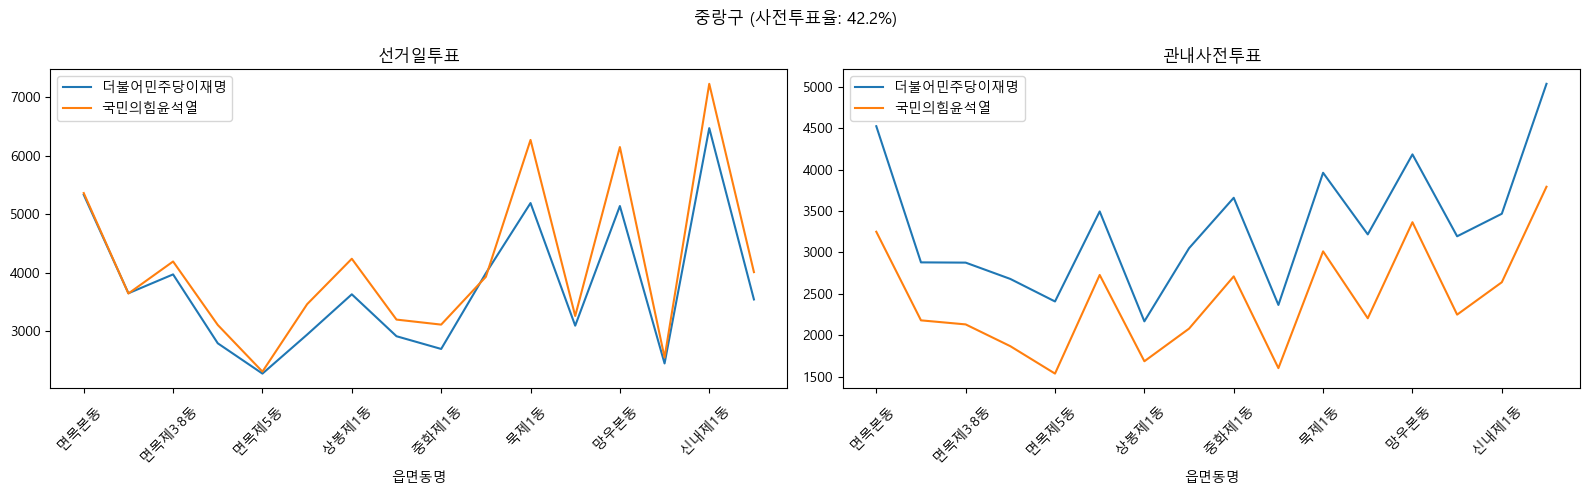

In [95]:
# 사전투표율 계산
early_total = early_voting[['더불어민주당이재명', '국민의힘윤석열']].astype(int).sum().sum()
onday_total = onday_voting[['더불어민주당이재명', '국민의힘윤석열']].astype(int).sum().sum()
total_votes = early_total + onday_total

early_rate = early_total / total_votes * 100

# 1행 2열 플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 전체 제목 (지역구명 + 사전투표율)
fig.suptitle(f'{지역구명} (사전투표율: {early_rate:.1f}%)', fontsize=12)

# 선거일 투표
onday_voting.set_index('읍면동명')[['더불어민주당이재명','국민의힘윤석열']] \
    .astype(int).plot(ax=axes[0], title='선거일투표', rot=45)

# 관내 사전투표
early_voting.set_index('읍면동명')[['더불어민주당이재명','국민의힘윤석열']] \
    .astype(int).plot(ax=axes[1], title='관내사전투표', rot=45)

plt.tight_layout()  # 타이틀 공간 확보
plt.show()
